In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
%matplotlib inline


In [14]:
#reading the file
data = pd.read_csv("Resources/winequality_white.csv")

In [15]:
#Replace spaces with _ for each column
data.columns = data.columns.str.replace(' ', '_')
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
#looking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [17]:
#Calculate and order correlations
correlations = data.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [18]:
#the distribution of wine values by grade
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

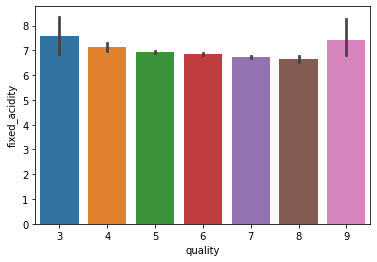

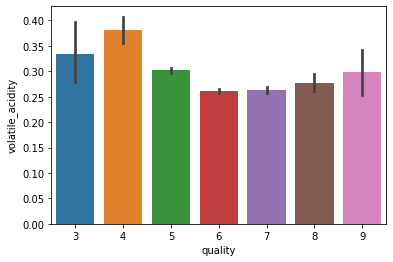

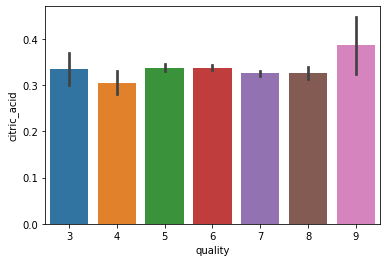

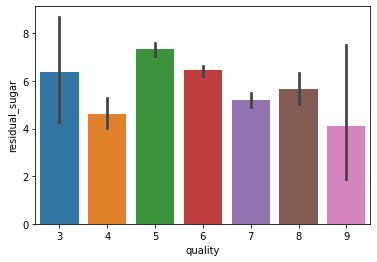

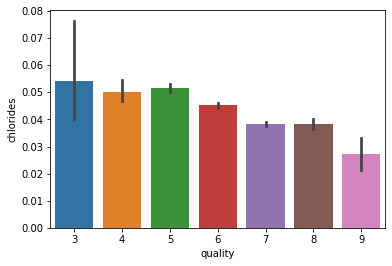

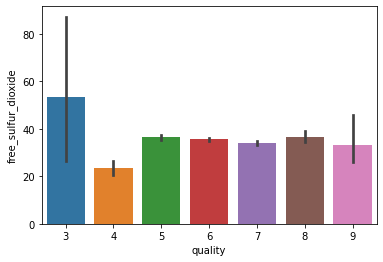

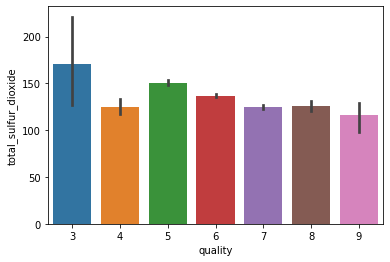

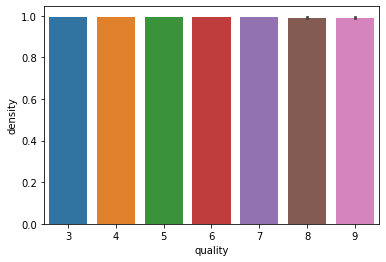

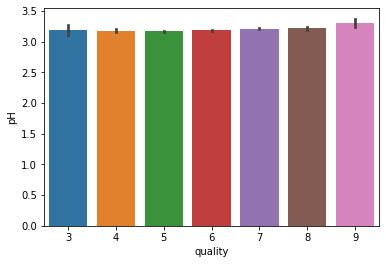

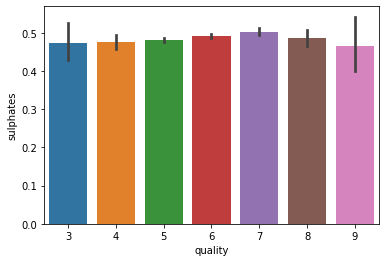

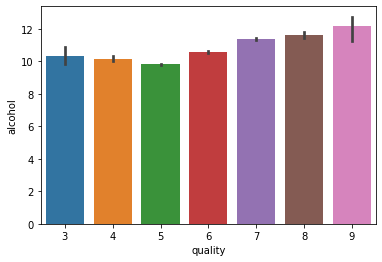

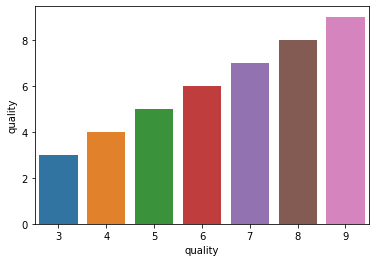

In [19]:
data1=data.select_dtypes([np.int, np.float])

for i, col in enumerate(data1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y=col, data =data1)

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

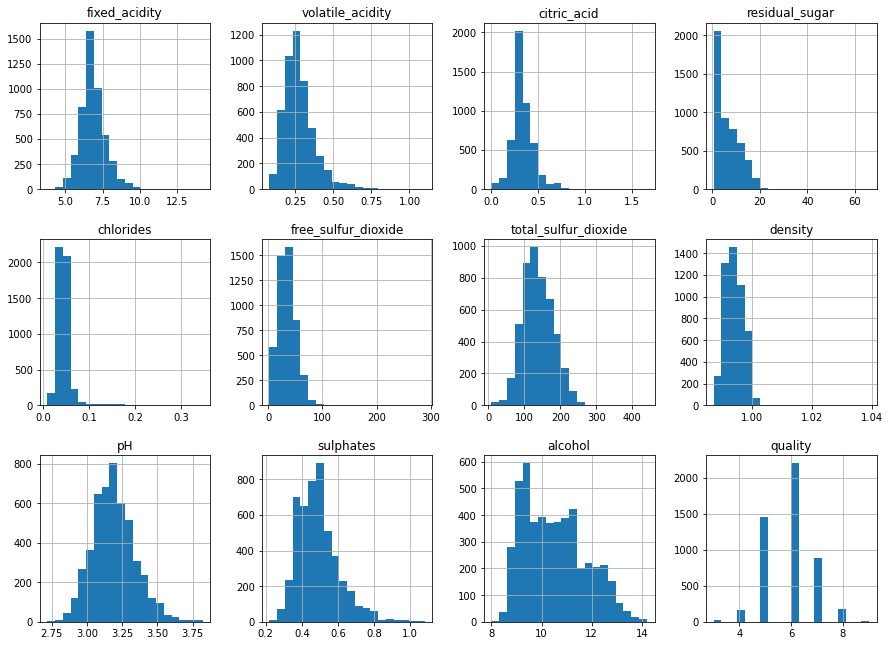

In [98]:
#looking at the distribution of data in each category. all tend to be right skewed
data.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed_acidity              AxesSubplot(0.125,0.749828;0.133621x0.130172)
volatile_acidity        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
citric_acid              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
residual_sugar          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chlorides               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
free_sulfur_dioxide        AxesSubplot(0.125,0.593621;0.133621x0.130172)
total_sulfur_dioxide    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
density                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pH                      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sulphates               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
alcohol                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
quality                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

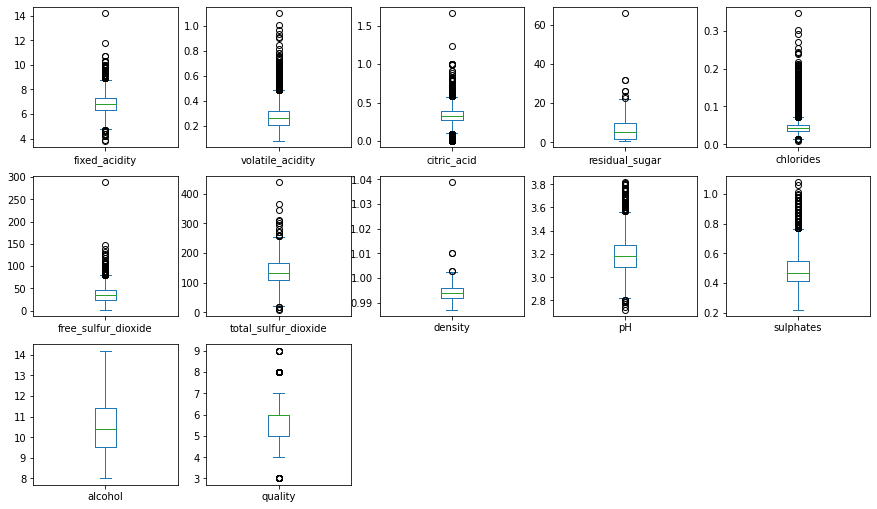

In [9]:
#checking outliers using box plot
data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

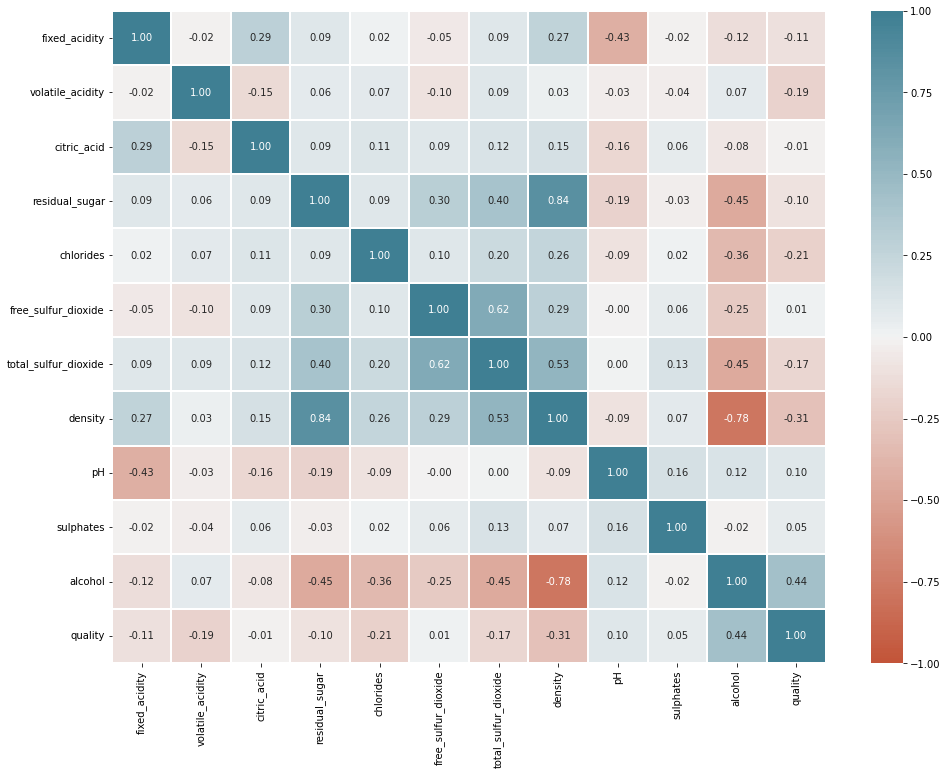

In [10]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

#plt.savefig('heatmap.svg', dpi=300, bbox_inches='tight')
plt.show()

Observation:
    
    1. quality and alcohol positively correlation
    2. quality and density negatively correlated 
    3. quality and chlorides negatively correlated
    4. quality and volatile acidity negatively correlated 
    5. density and alcohol negatively correlated (high) 
    6. density and residual sugar positively correlated (high)
    7. density and total sulfer dioxide positively correlated (high)
    8. free sulfer dioxide and total sulfer dioxide positvely correlated (High)
  

In [25]:
# Create Classification version of target variable
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]

# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
y = data['goodquality']

In [26]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [27]:
#five worst wines 
data.sort_values('quality', ascending=True).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,goodquality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,0
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3,0
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3,0
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,0
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3,0


In [37]:
#five best wines 
data.sort_values('quality', ascending=False).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,goodquality
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1


In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [46]:
#identify the dependant and independant variables
X=data.drop(['quality','fixed_acidity', 'sulphates','pH', 'free_sulfur_dioxide', 'citric_acid', 'density','goodquality'], axis =1)
y=data['goodquality']

In [48]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [50]:
#preparing training and testing data to perform machine learning algorithm 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
#Create a function within many Machine Learning models

def models(X_train, y_train):

    #using logistics Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #using KNeighborsClassifier method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier (n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    #Using SVC method of svm class to Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    #Using SVC method of svm class to use Kernel SVM algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    #using GaussianNB method of naive_bayes class to use Naive Bayes algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0 )
    forest.fit(X_train, y_train)
    
    #print model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train)) 
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train)) 
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

Evaluationg Performance on Training Sets

In [52]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.798111281265952
[1]K Nearest Neighbor Training Accuracy: 0.8639612046962736
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.787391526288923
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.787391526288923
[4]Gaussian Naive Bayes Training Accuracy: 0.7621235324144972
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9882593159775396


In [53]:
import pickle
rnd=model[6]
file = 'winequality.sav'
#save file
save = pickle.dump(rnd,open(file,'wb'))

In [172]:
file= "Scaler.sav"
pickle.dump(sc, open(file, "wb"))